# kNN & Clustering

__Суммарное количество баллов: 10__

## kNN и рак (3 балла)

В этом части домашнего задания Вам предлагается при помощи классификации методом k ближайших соседей научиться отличать тип опухоли в организме

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import pandas as pd

### 1. Данные (0.5 балла)


Реализуйте метод `read_cancer_dataset` . Он принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`.

In [2]:
CANCER_DATA_PATH = 'cancer.csv'  # YOUR_CODE

In [16]:
def read_cancer_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv)
    y = data['label'].copy()
    X = data.drop(['label'], axis=1).copy()
    return X, y

In [245]:
X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_cancer

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Начиная работать с данными, нам необходимо их предобработать и подготовить. В частности, нам необходимо разделить выборку на две: тренировочную и тестовую. Тренировочная выборка необходима для обучения алгоритма, а тестовая для проверки результатов обучения. Обычно используют коэффициент разделения `0.7`.

In [220]:
test = X_cancer.copy()
ind = set(np.arange(len(test)))
train = set(np.random.choice(len(test), round(len(test) * 0.6), replace=False))
test.iloc[list(ind.difference(train))]

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
513,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
503,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,...,30.79,23.87,211.50,2782.0,0.1199,0.3625,0.3794,0.22640,0.2908,0.07277
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.13640
508,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230


In [776]:
def train_test_split(X, y, ratio=0.7):
    # Возвращает X_train, y_train, X_test, y_test
    # X_train и X_test - массив векторов - две части массива X, разделенного в состветсви с коэффициентом ratio
    # y_train и y_test - соответствующие X_train и X_test метки классов

    N = len(X)

    # Множество всех индексов
    indicies = set(np.arange(N))

    # Выбор len(X)*ratio случайных индексов
    train_ind = np.random.choice(N, size=round(N * ratio), replace=False)

    # Тестовые индексы = Дополнение тренировочных до всех
    test_ind = list(indicies.difference(set(train_ind)))

    # Отбор данных по индексам
    X_train = X.iloc[train_ind]
    y_train = y.iloc[train_ind]

    X_test = X.iloc[test_ind]
    y_test = y.iloc[test_ind]

    return X_train, y_train, X_test, y_test
test, _1,_2,_3 = train_test_split(X_cancer, y_cancer, ratio=0.7)
test

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
116,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
384,13.280,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,0.1617,0.05594,...,14.240,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,0.2116,0.06077,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,12.360,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.042680,0.1954,0.07976,...,11.690,20.74,76.08,411.1,0.16620,0.20310,0.12560,0.09514,0.2780,0.11680
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,0.1555,0.06048,...,13.640,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083
423,13.660,19.13,89.46,575.3,0.09057,0.11470,0.096570,0.048120,0.1848,0.06181,...,15.140,25.50,101.40,708.8,0.11470,0.31670,0.36600,0.14070,0.2744,0.08839


### 2. Метрики (0.5 балла)

Также прежде чем приступать к решению задачи, нам необходимо определиться с метриками, которые позволят нам оценить полученное решение. Для задач классификации мы можем использовать precision, recall и accuracy. Эти метрики считаются для каждого класса. 

__Precision__ отражает то, насколько редко мы ошибаемся, когда говорим, что объект пренадлежит к классу. 

__Recall__ же отражает то, насколько редко классификатор неправильно классифицирует объекты данного класса.

__Accuracy__ отражает то, какую часть выборки классификатор отнес к правильному классу.

In [512]:
def get_precision_recall_accuracy(y_pred, y_true):
    # Возвращает precision, recall и accuracy
    # precision - набор значений метрики precision для каждого класса
    # recall - набор значений метрики recall для каждого класса
    # accuracy - число, отражающее общую точность предсказания
    
    klasses = list(set(y_true))
    
    prec = {}
    recall = {}
    
    TP_all = 0
    FP_all = 0
    FN_all = 0
    TN_all = 0
    
    for klass in klasses:
        TP = 0
        FP = 0
        FN = 0
        TN = 0
#         for i in range(len(y_true)):
#             if y_pred.iloc[i] == y_true.iloc[i] and y_true.iloc[i] == klass:
#                 TP += 1
#                 TP_all += 1
#             if y_pred.iloc[i] != y_true.iloc[i] and y_true.iloc[i] != klass:
#                 FP += 1
#                 FP_all += 1
#             if y_pred.iloc[i] != y_true.iloc[i] and y_true.iloc[i] == klass:
#                 FN += 1
#                 FP_all += 1
#             if y_pred.iloc[i] == y_true.iloc[i] and y_true.iloc[i] != klass:
#                 TN += 1
#                 FP_all += 1
#             else:
#                 raise NotImplementedError()
                
                
        for i in range(len(y_true)):
            if y_pred[i] == y_true[i] and y_true[i] == klass:
                TP += 1
                TP_all += 1
            elif y_pred[i] != y_true[i] and y_true[i] != klass:
                FP += 1
                FP_all += 1
            elif y_pred[i] != y_true[i] and y_true[i] == klass:
                FN += 1
                FP_all += 1
            elif y_pred[i] == y_true[i] and y_true[i] != klass:
                TN += 1
                FP_all += 1
            else:
                print(y_pred[i],y_true[i], klass)
                raise NotImplementedError()
        recall[klass] = TP / (TP + FN)
        prec[klass] = TP / (TP + FP)
        
    acc = (TP_all + TN_all) / (TP_all + FP_all + FN_all + TN_all)


    return prec, recall, acc
y_test.iloc[4]

'B'

Теперь, имея этот метод, мы можем построить кривые зависимости Precision, Recall и Accuracy от параметра `k`

In [503]:
# функция, преобразующая дата-фрейм М/В в вектор 0/1 соотвественно
fun = lambda x: 0 if x=='M' else 1

In [777]:
def plot_precision_recall(X_train, y_train, X_test, y_test, max_k=30):
    y_test = list(map(fun, np.array(y_test)))
    y_train = list(map(fun, np.array(y_train)))
    ks = list(range(1, max_k + 1))
    classes = len(np.unique(list(y_train) + list(y_test)))
    precisions = [[] for _ in range(classes)]
    recalls = [[] for _ in range(classes)]
    accuracies = []
    for k in ks:
        classifier = KNearest(k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        precision, recall, acc = get_precision_recall_accuracy(y_pred, np.array(y_test))
        for c in range(classes):
            precisions[c].append(precision[c])
            recalls[c].append(recall[c])
        accuracies.append(acc)

    def plot(x, ys, ylabel, legend=True):
        plt.figure(figsize=(12, 3))
        plt.xlabel("K")
        plt.ylabel(ylabel)
        plt.xlim(x[0], x[-1])
        plt.ylim(np.min(ys) - 0.01, np.max(ys) + 0.01)
        for cls, cls_y in enumerate(ys):
            plt.plot(x, cls_y, label="Class " + str(cls))
        if legend:
            plt.legend()
        plt.tight_layout()
        plt.show()

    plot(ks, recalls, "Recall")
    plot(ks, precisions, "Precision")
    plot(ks, [accuracies], "Accuracy", legend=False)

Также для оценки качества классификации построим __ROC-кривую__. Она отражает зависимость __True Positive Rate__ (TPR) от __False Positive Rate__ (FPR) для заранее фиксированного класса. Чем график выше побочной диагонали - тем лучше.

In [504]:
def plot_roc_curve(X_train, y_train, X_test, y_test, max_k=30):
    y_test = list(map(fun, np.array(y_test)))
    positive_samples = sum(1 for y in y_test if y == 0)
#     print(y_test)
    ks = list(range(1, max_k + 1))
    curves_tpr = []
    curves_fpr = []
    colors = []
    for k in ks:
        colors.append([k / ks[-1], 0, 1 - k / ks[-1]])
        knearest = KNearest(k)
        knearest.fit(X_train, y_train)
        p_pred = [p[0] for p in knearest.predict_proba(X_test)]
        tpr = []
        fpr = []
        for w in np.arange(-0.01, 1.02, 0.01):
            y_pred = [(0 if p > w else 1) for p in p_pred]
            tpr.append(
                sum(1
                    for yp, yt in zip(y_pred, y_test) if yp == 0 and yt == 0) /
                positive_samples)
            fpr.append(
                sum(1
                    for yp, yt in zip(y_pred, y_test) if yp == 0 and yt != 0) /
                (len(y_test) - positive_samples))
        curves_tpr.append(tpr)
        curves_fpr.append(fpr)
    plt.figure(figsize=(7, 7))
    for tpr, fpr, c in zip(curves_tpr, curves_fpr, colors):
        plt.plot(fpr, tpr, color=c)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.tight_layout()
    plt.show()

## 3. KNN (2 балла)
Осталось реализовать сам классификатор. Реализуйте его, используя KD-дерево. (При желании можно воспользоваться библиотечной реализацией дерева)

Метод `__init__` принимает на вход количество соседей, по которым предсказывается класс, и размер листьев KD-дерева.

Метод `fit` должен по набору данных и меток "обучать" классификатор. 

Метод `predict_proba` должен предсказывать вероятности классов для заданного набора данных основываясь на классах соседей

In [505]:
from sklearn.neighbors import KDTree


class KNearest:

    def __init__(self, n_neighbors=5, leaf_size=30):
        self.n_neighbors = n_neighbors
        self.leaf_size = leaf_size
#         raise NotImplementedError()

    def fit(self, X, y):
        self.Xtr = np.array(X)
        self.ytr = np.array(y)
        self.classes = np.array(list(set(self.ytr)))
        self.pred_df = pd.DataFrame(columns=self.classes)
        self.tree = KDTree(self.Xtr, leaf_size=self.leaf_size)

#         raise NotImplementedError()

    def predict_proba(self, X):
        # Возвращает матрицу, в которой строки соответствуют элементам X, а столбцы - классам. 
        # На пересечении строки и столбца должна быть указана вероятность того, что элемент относится к классу
        # Вероятность рассчитывается как количество ближайших соседей с данным классом, 
        # деленное на общее количество соседей
        
        for i in range(len(X.values)):
            dist, ind = self.tree.query(X.values[i].reshape(1,-1), k=self.n_neighbors)  
            d = {}
            for klass in self.classes:
                d.update({
                    klass:len(self.ytr[ind][0][self.ytr[ind][0] == klass])/self.n_neighbors
                })
#                 print(len(self.ytr[ind][0][self.ytr[ind][0] == klass]))
            self.pred_df = self.pred_df.append(d, ignore_index = True)
        return np.array(self.pred_df)
#         raise NotImplementedError()

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Наконец, протестируем наш классификатор на датасете _cancer_

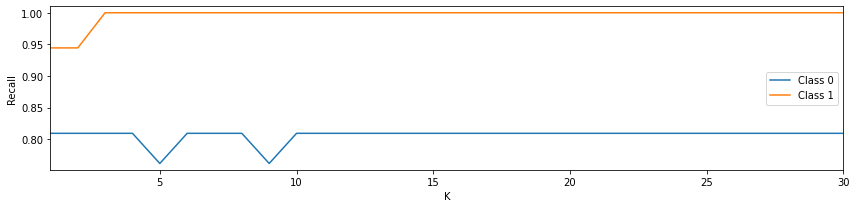

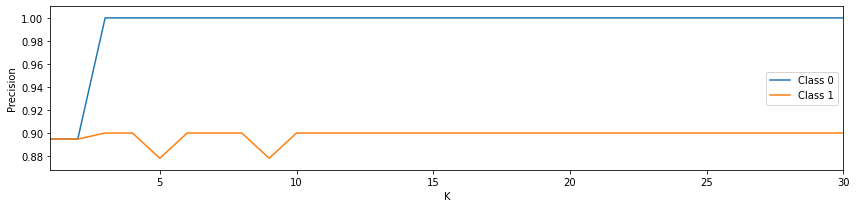

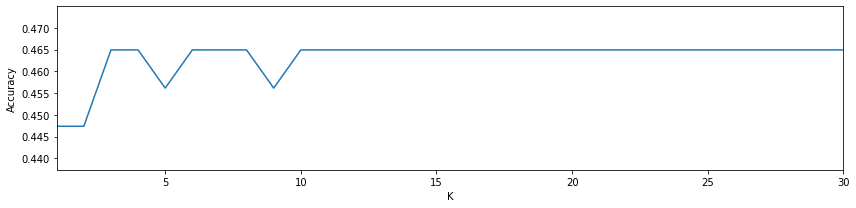

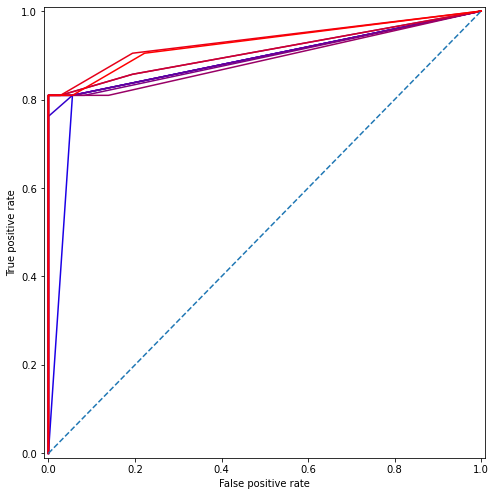

In [778]:
X_train, y_train, X_test, y_test = train_test_split(X_cancer, y_cancer, 0.9)
plot_precision_recall(X_train, y_train, X_test, y_test)
plot_roc_curve(X_train, y_train, X_test, y_test, max_k=10)



Проанализируйте полученные графики. Какой параметр `k` кажется лучшим? Какая из метрик лучше всего отражает качество модели? 

Я думаю, оптимальный $k=5$. Меньшие значения дают плохие показатели precision и recall, а также 
меньшую площадь под ROC-кривой. Большие же значения, в свою очередь, не дают значимого прироста качества,
но замедляют работу программы.

## Clustering (7 баллов)

В этой части домашнего задания предлагается реализовать три различных метода кластеризации, понять, в каких случаях стоит применять те или иные методы.

In [523]:
from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_moons, make_swiss_roll
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import cv2
from collections import deque

In [890]:
def visualize_clasters(X, labels):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
#     print(labels, len(unique_colors), len(unique_labels))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(9, 9))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()


def clusters_statistics(flatten_image, cluster_colors, cluster_labels):
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))
    for remove_color in range(3):
        axes_pair = axes[remove_color]
        first_color = 0 if remove_color != 0 else 2
        second_color = 1 if remove_color != 1 else 2
        axes_pair[0].scatter([p[first_color] for p in flatten_image],
                             [p[second_color] for p in flatten_image],
                             c=flatten_image,
                             marker='.')
        axes_pair[1].scatter([p[first_color] for p in flatten_image],
                             [p[second_color] for p in flatten_image],
                             c=[cluster_colors[c] for c in cluster_labels],
                             marker='.')
        for a in axes_pair:
            a.set_xlim(0, 1)
            a.set_ylim(0, 1)
    plt.show()

Генерируем два синтетических набора данных для кластеризации. Далее будем тестировать наши алгоритмы на них.

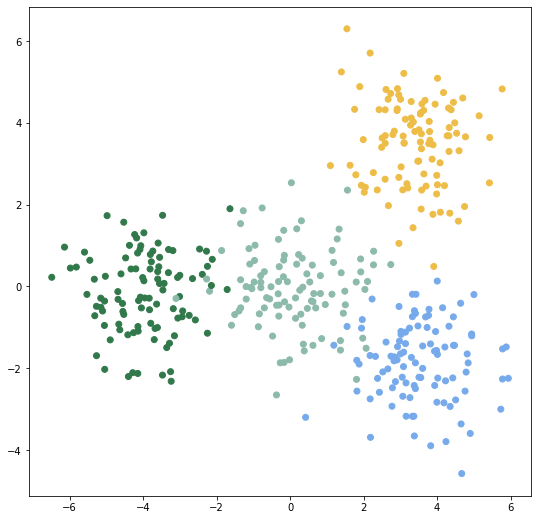

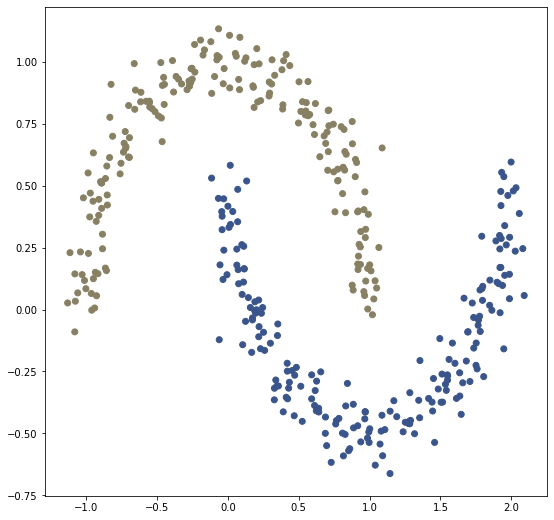

In [629]:
X_1, true_labels = make_blobs(400,
                              2,
                              centers=[[0, 0], [-4, 0], [3.5, 3.5],
                                       [3.5, -2.0]])
visualize_clasters(X_1, true_labels)
X_2, true_labels = make_moons(400, noise=0.075)
visualize_clasters(X_2, true_labels)

### 1. K-means (2.5 балла)

Первый метод, который предлагается реализовать - метод K средних.

__Описание методов__

`fit(X, y=None)` ищет и запоминает в `self.centroids` центроиды кластеров для набора данных.
`predict(X)` для каждого элемента из `X` возвращает номер кластера, к которому относится данный элемент.

__Инициализация кластеров__

Есть несколько вариантов инициализации кластеров. Нужно реализовать их все:
1. `random` - центроиды кластеров являются случайными точками
2. `sample` - центроиды кластеров выбираются случайно из набора данных
3. `k-means++` - центроиды кластеров инициализируются при помощи метода K-means++


In [604]:
X_1[:6]

array([[ 2.77430535, -1.31933706],
       [ 3.13680455,  4.24345294],
       [ 5.62641252,  3.36313247],
       [-1.80339563, -0.39323268],
       [ 4.15546607, -3.60025837],
       [ 3.39567272, -1.52721874]])

In [741]:
from sklearn.neighbors import KDTree

class KMeans:

    def __init__(self, n_clusters, init="sample", max_iter=300, leaf=30):
        
        self.method = init
        self.n = n_clusters
        self.leaf = leaf
        self.clusters = np.arange(n_clusters)
        self.max_iter = max_iter
        
    def dist_sq(self, x1,x2):
#         print(np.sum((x2-x1)**2, axis=1)[:4])
#         print((x2[0]-x1[0])**2)
#         print(x1[0]-x2[0])
#         print(x1[0],x2[0])
#         print('____________________')
        return np.sum((x2-x1)**2, axis=1)
#         return (x2-x1)**2
        
    def fit(self, X, y=None):
        
        self.labels = np.zeros(len(X))
        
        if self.method == 'sample':
            inds = np.random.choice(len(X), self.n, replace=False)
            self.centroids = X[inds]
        elif self.method == 'random':
            self.centroids = np.random.normal(size=(self.n, len(X[0])))
        elif self.method == 'k-means++':
            self.centroids = np.zeros(shape=(self.n, len(X[0])))
            ind = np.random.choice(len(X), 1, replace=False)
            self.centroids[0] = X[ind]
            for i in range(1, self.n):
                dists = self.dist_sq(self.centroids[i-1], X)
#                 print(dists[2], np.sum(dists[:2], axis=None))
                dists /= dists.sum()
                ind = np.random.choice(len(X), 1, replace=False, p = dists)
                self.centroids[i] = X[ind]
            
        else:
            raise NotImplementedError()
            
        
        for _ in range(15):
            
            self.tree = KDTree(self.centroids, leaf_size=self.leaf)
        
            # Распределение точек по кластерам
            for i in range(len(X)):
                dist, inds = self.tree.query(X[i].reshape(1,-1), 1)
                self.labels[i] = inds[0][0]

            # Перерасчет центроид
            for i in range(self.n):
                self.centroids[i] = X[self.labels == i].sum(axis=0)/len(X[self.labels==i])
        
        self.tree = KDTree(self.centroids, leaf_size=self.leaf)
        
            
    def predict(self, X):
        self.labels = np.zeros(len(X),dtype=int)
        
        for i in range(len(X)):
            _, ind = self.tree.query(X[i].reshape(1,-1), 1)
            self.labels[i] = ind[0][0]
#         raise NotImplementedError()
        return self.labels
        
test = KMeans(3, init='k-means++')
test.fit(X_1)
# test = np.array([[1,2],[3,4]])


Протестируйте алгоритм на синтетических данных. При необходимости подберите гиперпараметры для достижения лучшего качества кластеризации.

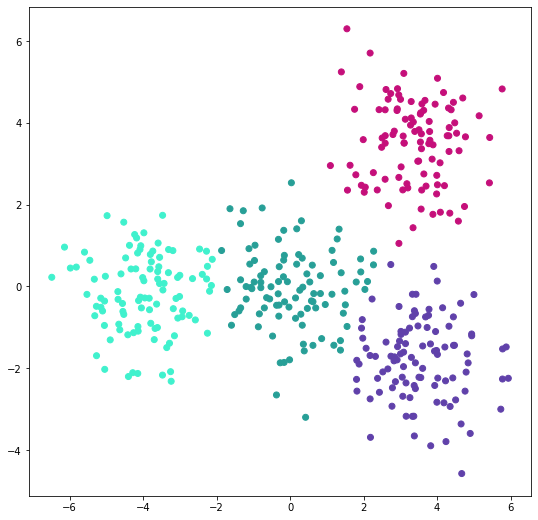

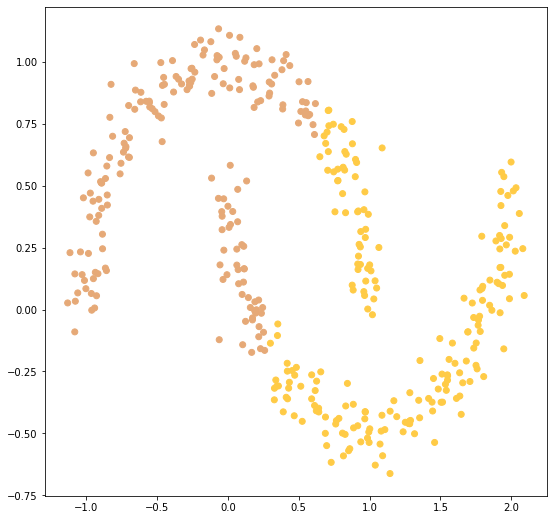

In [744]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
visualize_clasters(X_1, labels)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels)

### 2. DBScan (3.5 балла)
В отличии от K-means, DBScan не позволяет задать количество кластеров, на которое будут разбиты данные. Руководствуясь геометрической интерпретацией, он позволяет выделять кластеры более сложной формы.

__Описание методов__

`fit_predict(X, y=None)` для каждого элемента `X` возвращает метку кластера, к которому он относится.

__Возможные метрики__

* `euclidean`
* `manhattan`
* `chebyshev`

__Для быстрого поиска соседей используйте `sklearn.neighbors.KDTree`__

In [913]:
from sklearn.neighbors import KDTree

class DBScan:

    def __init__(self,
                 eps=0.5,
                 min_samples=5,
                 leaf_size=40,
                 metric="euclidean"):
        
        self.eps = eps
        self.min_samples = min_samples 
        self.leaf_size = leaf_size
        self.metric = metric
        
#         raise NotImplementedError()

    def fit_predict(self, X, y=None):
        
        self.cores = np.zeros(len(X), dtype=int)
        self.borders =np.zeros(len(X), dtype=int)
        self.noise = np.zeros(len(X), dtype=int)
        
        self.labels = np.zeros(len(X), dtype=int) - 1
        self.num_clus = 0
        self.visited = np.zeros(len(X))
        
        self.tree = KDTree(X, leaf_size=self.leaf_size)
        
        # Отметка ядерных точек
        for i in range(len(X)):
            dists, inds = self.tree.query(X[i].reshape(1,-1), self.min_samples)
            if np.sum(dists < self.eps) >= self.min_samples:
                self.cores[i] = 1
        # Граничные точки
        for i in range(len(X)):
            dists, inds = self.tree.query(X[i].reshape(1,-1), self.min_samples)
            if np.sum(dists < self.eps) < self.min_samples and np.sum(self.cores[inds]) > 0:
                self.borders[i] = 1
                
        # Шумовые точки
        for i in range(len(X)):
            dists, inds = self.tree.query(X[i].reshape(1,-1), self.min_samples)
            if np.sum(dists < self.eps) < self.min_samples and np.sum(self.cores[inds]) == 0:
                self.noise[i] = 1
            
            
        for i in range(len(X)):
            dists, inds = self.tree.query(X[i].reshape(1,-1), self.min_samples)
            
            if self.cores[i] == 1 and self.visited[i] != 1:
                self.labels[i] = self.num_clus
                self.visited[i] = 1
#             elif self.cores[ind]

        d = dict()
        
        for i in np.array(np.where(self.cores==1))[0]:
            d[i] = []
            dists, inds = self.tree.query(X[i].reshape(1,-1), self.min_samples)
#             print(dists[0][1])
#             print(self.cores)
            for j in range(self.min_samples):
                if dists[0][j] < self.eps and self.cores[inds[0][j]] == 1: # and inds[0][j] != i:
                    d[i] += [inds[0][j]]
#             print(d[i])
        
        visited = set()
        labels = 0
        for key in d.keys():
            
            self.labels[key] = labels
            
            for i in range(len(d[key])):
                self.labels[d[key][i]] = labels
                        
            visited.add(key)
            labels += 1
            pass
        
#         print(d)
#         print(len(self.labels))
        temp = np.array(list(set(self.labels)))
        for i in range(len(temp)):
            self.labels[np.where(self.labels == temp[i])] = i
        return self.labels
        
test = DBScan(eps=0.05)
len(np.unique(test.fit_predict(X_2)))
# np.array(np.where(test.cores==1))[0][0]


23

Протестируйте алгоритм на синтетических данных. При необходимости подберите гиперпараметры для достижения лучшего качества кластеризации.

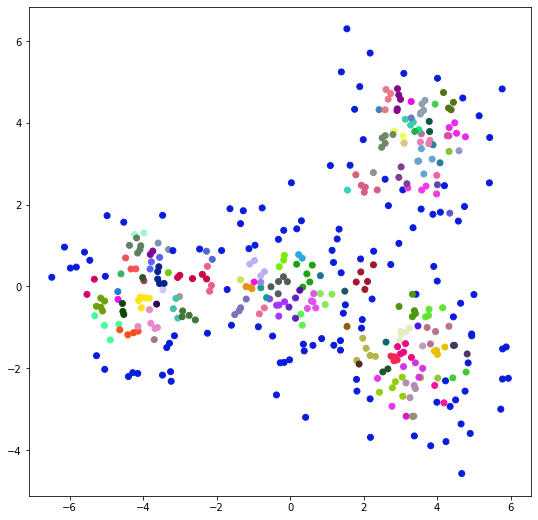

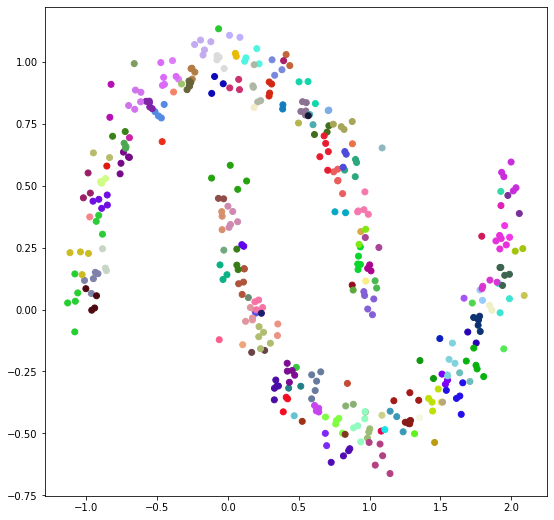

In [914]:
dbscan = DBScan()
labels = dbscan.fit_predict(X_1)
visualize_clasters(X_1, labels)

dbscan = DBScan()
labels = dbscan.fit_predict(X_2)
visualize_clasters(X_2, labels)

### 3. Оценка качества моделей (1 балл)
Проанализируйте полученные результаты. 

Какой метод лучше справился с кластеризацией? Почему? 

Сравните значения метрик  `Davies-Bouldin index` и `Silhouette score` для определения качества кластеризации. 

Какие значения метрики свидетельствуют о хорошей кластеризации - большие или маленькие?

_Ваш ответ_

In [915]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [921]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
s11 = davies_bouldin_score(X_1, labels)
s12 = silhouette_score(X_1, labels)
print(s11,s12)
labels = dbscan.fit_predict(X_1)
s21 = davies_bouldin_score(X_2, labels)
s22 = silhouette_score(X_2, labels)
print(s21,s22)

0.6050938394507392 0.5531660409708185
16.466711449911834 -0.7936196469382825
